In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.performance import *
from alphalens.plotting import *
from alphalens.tears import *

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
performance = pd.read_pickle('single_factor.pickle')
performance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   pnl                      755 non-null    float64            
 3   positions                755 non-null    object             
 4   starting_exposure        755 non-null    float64            
 5   longs_count              755 non-null    int64              
 6   ending_exposure          755 non-null    float64            
 7   orders                   755 non-null    object             
 8   starting_cash            755 non-null    float64            
 9   returns                  755 non-null    float64            
 10  transactions             755 non-null    object  

In [3]:
performance.tail()

,period_open,period_close,pnl,positions,starting_exposure,longs_count,ending_exposure,orders,starting_cash,returns,...,algo_volatility,period_label,max_drawdown,benchmark_period_return,benchmark_volatility,excess_return,sortino,max_leverage,factor_data,prices
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,4267.650000,"[{'sid': Equity(1720 [LRCX]), 'amount': 2156, ...",795896.19,2,800163.84,[],9.376948e+06,0.000420,...,0.022630,2017-12,-0.056341,0.0,0.0,0.0,0.383575,0.528461,Equity(8 [AAPL]) 1826.0 Equity(12 [ABBV])...,Equity(8 [AAPL]) 176.42 Equity(12 [ABBV])...
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-2207.630000,"[{'sid': Equity(1720 [LRCX]), 'amount': 2156, ...",800163.84,2,797956.21,"[{'id': 'a03aabfdc1dc49179119666dd69b2cc1', 'd...",9.376948e+06,-0.000217,...,0.022615,2017-12,-0.056341,0.0,0.0,0.0,0.378769,0.528461,Equity(8 [AAPL]) 1862.0 Equity(12 [ABBV])...,Equity(8 [AAPL]) 170.57 Equity(12 [ABBV])...
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,4613.778057,"[{'sid': Equity(1531 [ISRG]), 'amount': 1112, ...",797956.21,2,818372.80,"[{'id': 'a03aabfdc1dc49179119666dd69b2cc1', 'd...",9.376948e+06,0.000453,...,0.022602,2017-12,-0.056341,0.0,0.0,0.0,0.388000,0.528461,Equity(8 [AAPL]) 1862.0 Equity(12 [ABBV])...,Equity(8 [AAPL]) 170.57 Equity(12 [ABBV])...
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,2091.000000,"[{'sid': Equity(1531 [ISRG]), 'amount': 1112, ...",818372.80,2,820463.80,[],9.361145e+06,0.000205,...,0.022587,2017-12,-0.056341,0.0,0.0,0.0,0.392035,0.528461,Equity(8 [AAPL]) 1862.0 Equity(12 [ABBV])...,Equity(8 [AAPL]) 170.57 Equity(12 [ABBV])...
2017-12-29 21:00:00+00:00,2017-12-29 14:31:00+00:00,2017-12-29 21:00:00+00:00,-4187.040000,"[{'sid': Equity(1531 [ISRG]), 'amount': 1112, ...",820463.80,2,816276.76,[],9.361145e+06,-0.000411,...,0.022573,2017-12,-0.056341,0.0,0.0,0.0,0.383145,0.528461,Equity(8 [AAPL]) 1862.0 Equity(12 [ABBV])...,Equity(8 [AAPL]) 170.57 Equity(12 [ABBV])...


In [4]:
prices = pd.concat([df.to_frame(d) for d, df in performance.prices.dropna().items()],axis=1).T
prices.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in prices.columns]
prices.index = prices.index.normalize()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-01-05 00:00:00+00:00 to 2017-12-29 00:00:00+00:00
Columns: 246 entries, AAL to TMO
dtypes: float64(246)
memory usage: 1.4 MB


In [5]:
prices.tail()

,AAL,AAPL,ABBV,AGN,AIG,AMGN,AMZN,APA,APC,AXP,...,SNI,COL,BBY,EFX,EL,DWDP,SBAC,AMT,PCG,TMO
2017-12-22 00:00:00+00:00,NaN,176.42,98.19,170.91,NaN,176.14,1190.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71.39,NaN,NaN,NaN,NaN
2017-12-26 00:00:00+00:00,NaN,170.57,97.75,164.44,NaN,176.09,1176.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71.44,NaN,NaN,44.45,NaN
2017-12-27 00:00:00+00:00,NaN,170.57,97.75,164.44,NaN,176.09,1176.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71.44,NaN,NaN,44.45,NaN
2017-12-28 00:00:00+00:00,NaN,170.57,97.75,164.44,NaN,176.09,1176.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71.44,NaN,NaN,44.45,NaN
2017-12-29 00:00:00+00:00,NaN,170.57,97.75,164.44,NaN,176.09,1176.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71.44,NaN,NaN,44.45,NaN


In [6]:
factor_data = pd.concat([df.to_frame(d) for d, df in performance.factor_data.dropna().items()],axis=1).T
factor_data.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in factor_data.columns]
factor_data.index = factor_data.index.normalize()
factor_data = factor_data.stack()
factor_data.index.names = ['date', 'asset']
factor_data.head()

date                       asset
2015-01-05 00:00:00+00:00  AAL       870.0
                           AAPL     2977.0
                           ABBV     2806.0
                           AGN      2744.0
                           AIG      1093.0
dtype: float64

In [7]:
factor_data.tail()

date                       asset
2017-12-29 00:00:00+00:00  AMD      1790.0
                           LRCX     2430.0
                           ISRG     2449.0
                           DWDP     1277.0
                           PCG      2440.0
dtype: float64

In [9]:
with pd.HDFStore('data/assets.h5') as store:
    sp500 = store['sp500/stooq'].close
sp500 = sp500.resample('D').ffill().tz_localize('utc').filter(prices.index.get_level_values(0))
sp500.head()

Date
2015-01-05 00:00:00+00:00    2020.58
2015-01-06 00:00:00+00:00    2002.61
2015-01-07 00:00:00+00:00    2025.90
2015-01-08 00:00:00+00:00    2062.14
2015-01-09 00:00:00+00:00    2044.81
Name: close, dtype: float64

In [10]:
HOLDING_PERIODS = (5, 10, 21, 42)
QUANTILES = 5
alphalens_data = get_clean_factor_and_forward_returns(factor=factor_data, prices=prices,
                                                      periods=HOLDING_PERIODS, quantiles=QUANTILES)

Dropped 5.6% entries from factor data: 5.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [24]:
alphalens_data.tail(10)

5D       10D       21D       42D  \
date                      asset                                           
2017-10-30 00:00:00+00:00 EXPE   0.023043  0.000582  0.053822 -0.019799   
                          KR     0.033430  0.072674  0.072674  0.072674   
                          LMT    0.000000  0.000000  0.000000  0.010206   
                          NVDA   0.028405  0.043122  0.050530 -0.031397   
                          WDC    0.024012  0.030889  0.030889 -0.067490   
                          AMD    0.095500  0.018365  0.060606 -0.039486   
                          LRCX   0.002279  0.014694  0.022939 -0.106159   
                          EFX   -0.008990 -0.008990 -0.008990 -0.008990   
                          DWDP  -0.020089 -0.017020 -0.021624 -0.003348   
                          PCG   -0.008731 -0.006635 -0.053780 -0.223852   

                                 factor  factor_quantile  
date                      asset                           
2017-10-30 00:00:00+00:00 EXPE   2476.0                5  
                          KR      521.0                2  
                          LMT    2142.0                4  
                          NVDA    813.0                3  
                          WDC    1715.0                4  
                          AMD    2079.0                4  
                          LRCX    250.0                1  
                          EFX     630.0                2  
                          DWDP    933.0                3  
                          PCG    2481.0                5

In [12]:
alphalens_data.reset_index().head().to_csv('factor_data.csv', index=False)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1736.0,331.971559,253.759030,14240,20.005620
2,147.0,2205.0,874.865660,340.297992,14240,20.005620
3,459.0,2633.0,1425.393319,374.837101,14220,19.977522
4,902.0,2845.0,1980.268539,345.910374,14240,20.005620
5,1618.0,3042.0,2512.713834,252.680908,14240,20.005620


Returns Analysis


,5D,10D,21D,42D
Ann. alpha,0.016,0.015,0.002,0.004
beta,0.087,0.091,0.068,0.041
Mean Period Wise Return Top Quantile (bps),7.274,6.705,3.030,2.048
Mean Period Wise Return Bottom Quantile (bps),-4.268,-1.114,1.897,-0.091
Mean Period Wise Spread (bps),11.542,7.798,1.146,2.148


Information Analysis


,5D,10D,21D,42D
IC Mean,0.023,0.019,0.011,0.010
IC Std.,0.174,0.155,0.148,0.144
Risk-Adjusted IC,0.133,0.126,0.075,0.070
t-stat(IC),3.556,3.349,1.994,1.869
p-value(IC),0.000,0.001,0.047,0.062
IC Skew,0.164,0.166,0.560,0.306
IC Kurtosis,-0.273,-0.390,0.468,0.398


Turnover Analysis


,5D,10D,21D,42D
Quantile 1 Mean Turnover,0.426,0.599,0.836,0.855
Quantile 2 Mean Turnover,0.658,0.750,0.801,0.822
Quantile 3 Mean Turnover,0.680,0.778,0.817,0.823
Quantile 4 Mean Turnover,0.654,0.747,0.820,0.825
Quantile 5 Mean Turnover,0.416,0.591,0.833,0.841


,5D,10D,21D,42D
Mean Factor Rank Autocorrelation,0.712,0.461,0.01,-0.005


<Figure size 432x288 with 0 Axes>

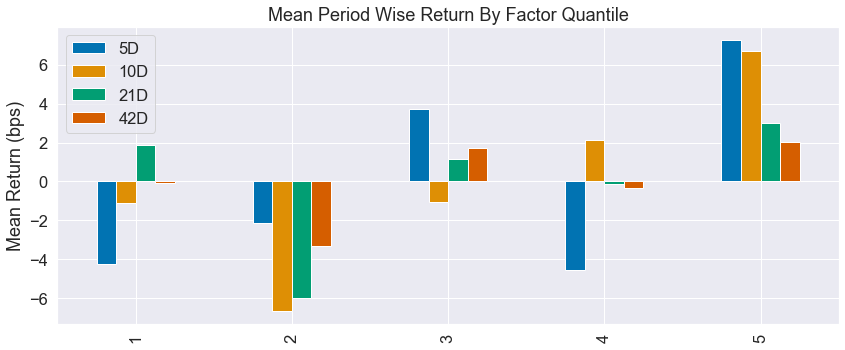

In [13]:
# Summary Tear Sheet
create_summary_tear_sheet(alphalens_data)

# risk-adjusted IC
# - (the mean IC)/(standard deviation of the IC)
# - which is also subjected to a two-sided t-test with the null hypothesis IC = 0 using scipy.stats.ttest_1samp

In [14]:
# Predictive performance by factor quantiles - Returns Analysis
mean_return_by_q, std_err = mean_return_by_quantile(alphalens_data)
mean_return_by_q_norm = mean_return_by_q.apply(lambda x: x.add(1).pow(1/int(x.name[:-1])).sub(1))

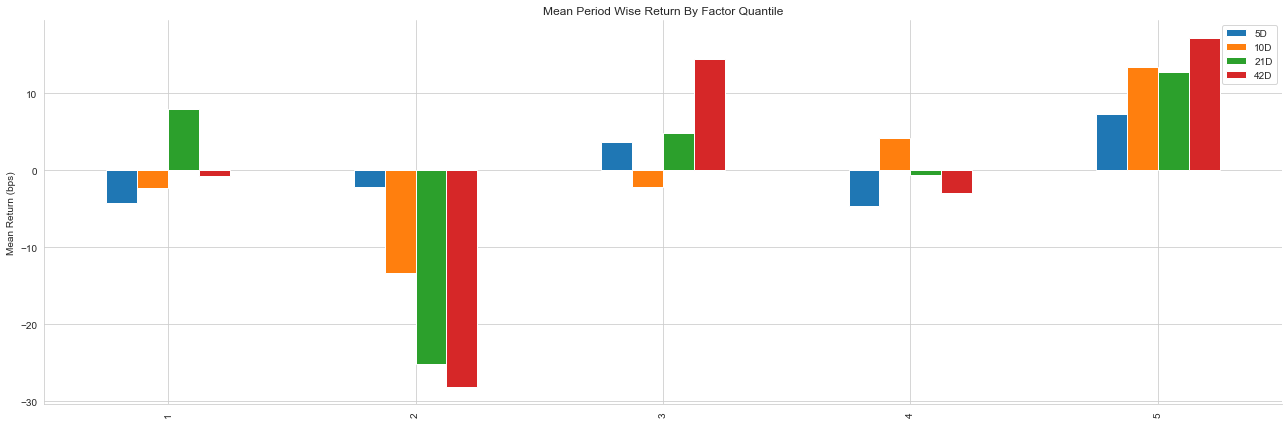

In [15]:
# Mean Return by Holding Period and Quintile
plot_quantile_returns_bar(mean_return_by_q)
plt.tight_layout()
sns.despine();

In [16]:
mean_return_by_q_daily, std_err = mean_return_by_quantile(alphalens_data, by_date=True)

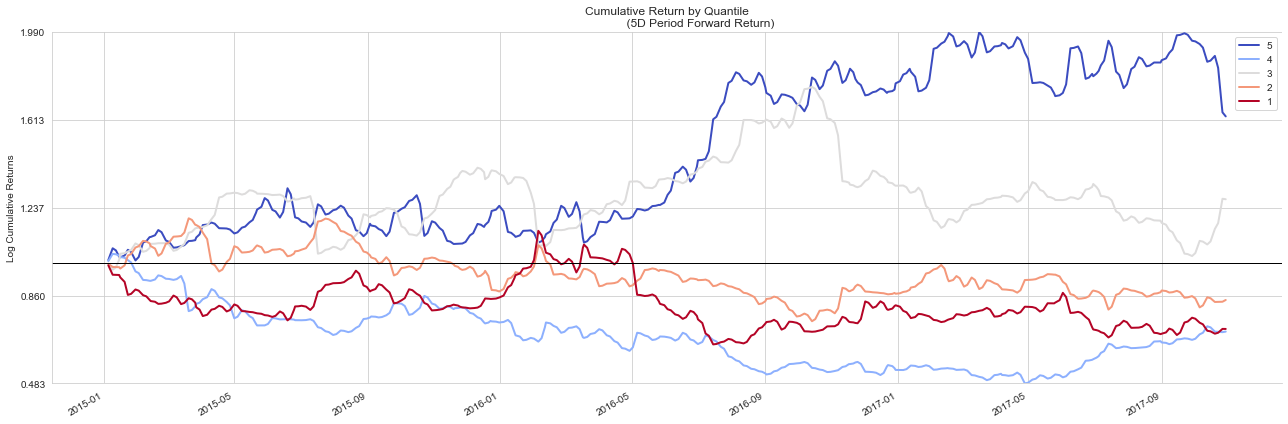

In [17]:
# Cumulative 5D Return
plot_cumulative_returns_by_quantile(mean_return_by_q_daily['5D'], period='5D', freq=None)
plt.tight_layout()
sns.despine();

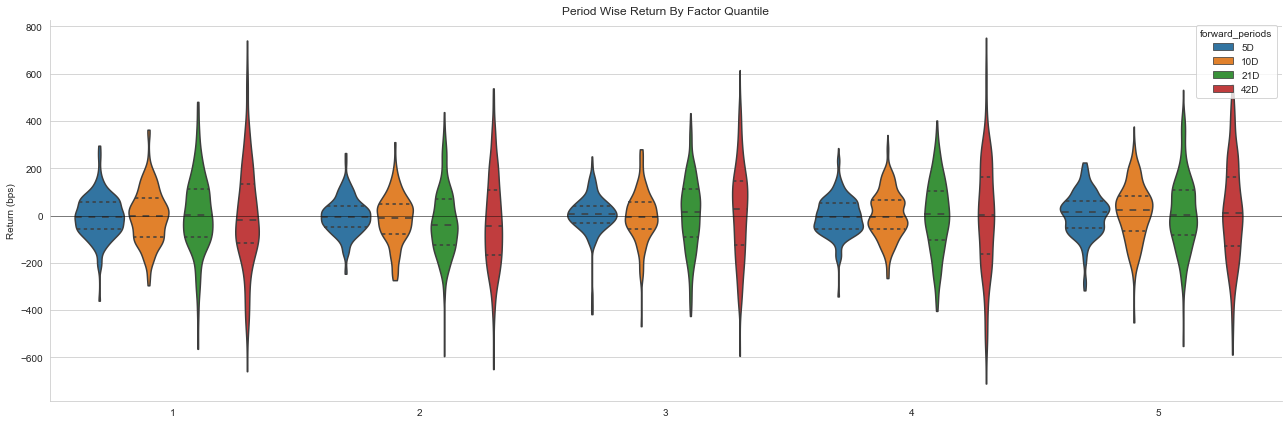

In [18]:
# Return Distribution by Holding Period and Quintile
plot_quantile_returns_violin(mean_return_by_q_daily)
plt.tight_layout()
sns.despine();

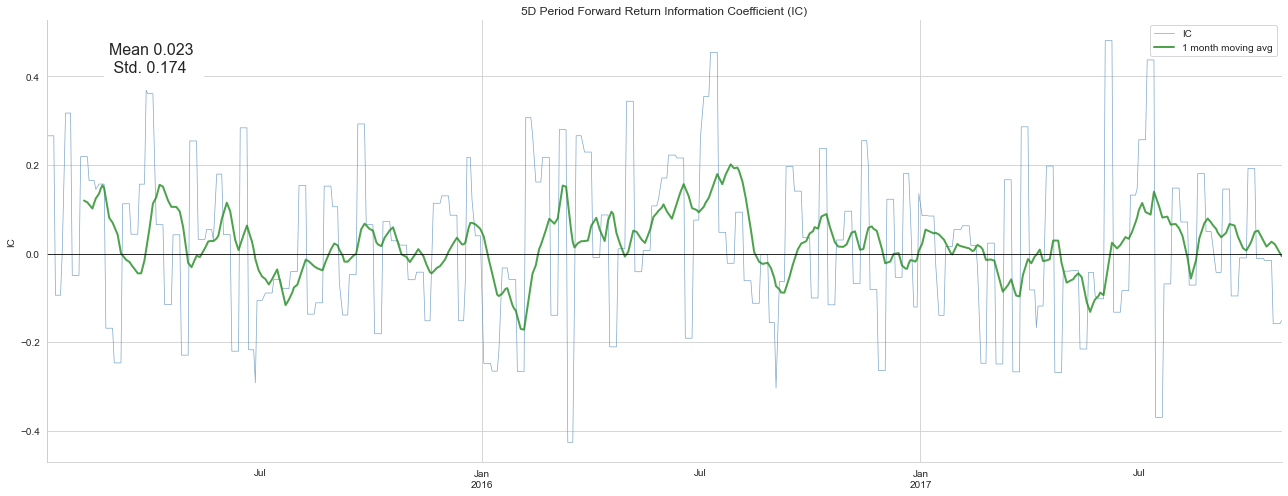

In [19]:
# Information Coefficient
# Information Ratio measures the average excess return per unit of risk taken by dividing alpha by the tracking risk.
# 5D Information Coefficient (Rolling Average) - get IC using Alphalens, which relies on scipy.stats.spearmanr
ic = factor_information_coefficient(alphalens_data)
plot_ic_ts(ic[['5D']])
plt.tight_layout()
sns.despine();

# It is better to use the non-parametric Spearman rank correlation coefficient, which measures how well the relationship between two variables can be described using a monotonic function, as opposed to the Pearson correlation, which measures the strength of a linear relationship.

In [26]:
ic.tail(10)

,5D,10D,21D,42D
date,,,,
2017-10-17 00:00:00+00:00,-0.015566,-0.008125,0.023055,0.021362
2017-10-18 00:00:00+00:00,-0.015566,-0.008125,0.023055,-0.009013
2017-10-19 00:00:00+00:00,-0.015566,-0.008125,0.023055,-0.009013
2017-10-20 00:00:00+00:00,-0.015566,-0.008125,-0.040361,-0.009013
2017-10-23 00:00:00+00:00,-0.158322,-0.226295,-0.261279,-0.110807
2017-10-24 00:00:00+00:00,-0.158322,-0.226295,-0.261279,-0.110807
2017-10-25 00:00:00+00:00,-0.158322,-0.226295,-0.261279,-0.092817
2017-10-26 00:00:00+00:00,-0.158322,-0.226295,-0.256742,-0.092817
2017-10-27 00:00:00+00:00,-0.158322,-0.226295,-0.256742,-0.092817


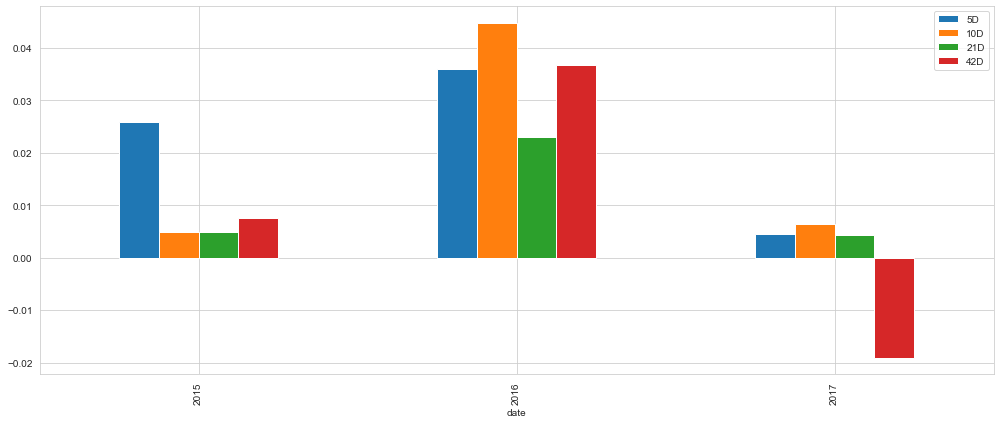

In [20]:
# Information Coefficient by Holding Period
ic = factor_information_coefficient(alphalens_data)
ic_by_year = ic.resample('A').mean()
ic_by_year.index = ic_by_year.index.year
ic_by_year.plot.bar(figsize=(14, 6))
plt.tight_layout();

Turnover Analysis


,5D,10D,21D,42D
Quantile 1 Mean Turnover,0.426,0.599,0.836,0.855
Quantile 2 Mean Turnover,0.658,0.750,0.801,0.822
Quantile 3 Mean Turnover,0.680,0.778,0.817,0.823
Quantile 4 Mean Turnover,0.654,0.747,0.820,0.825
Quantile 5 Mean Turnover,0.416,0.591,0.833,0.841


,5D,10D,21D,42D
Mean Factor Rank Autocorrelation,0.712,0.461,0.01,-0.005


<Figure size 432x288 with 0 Axes>

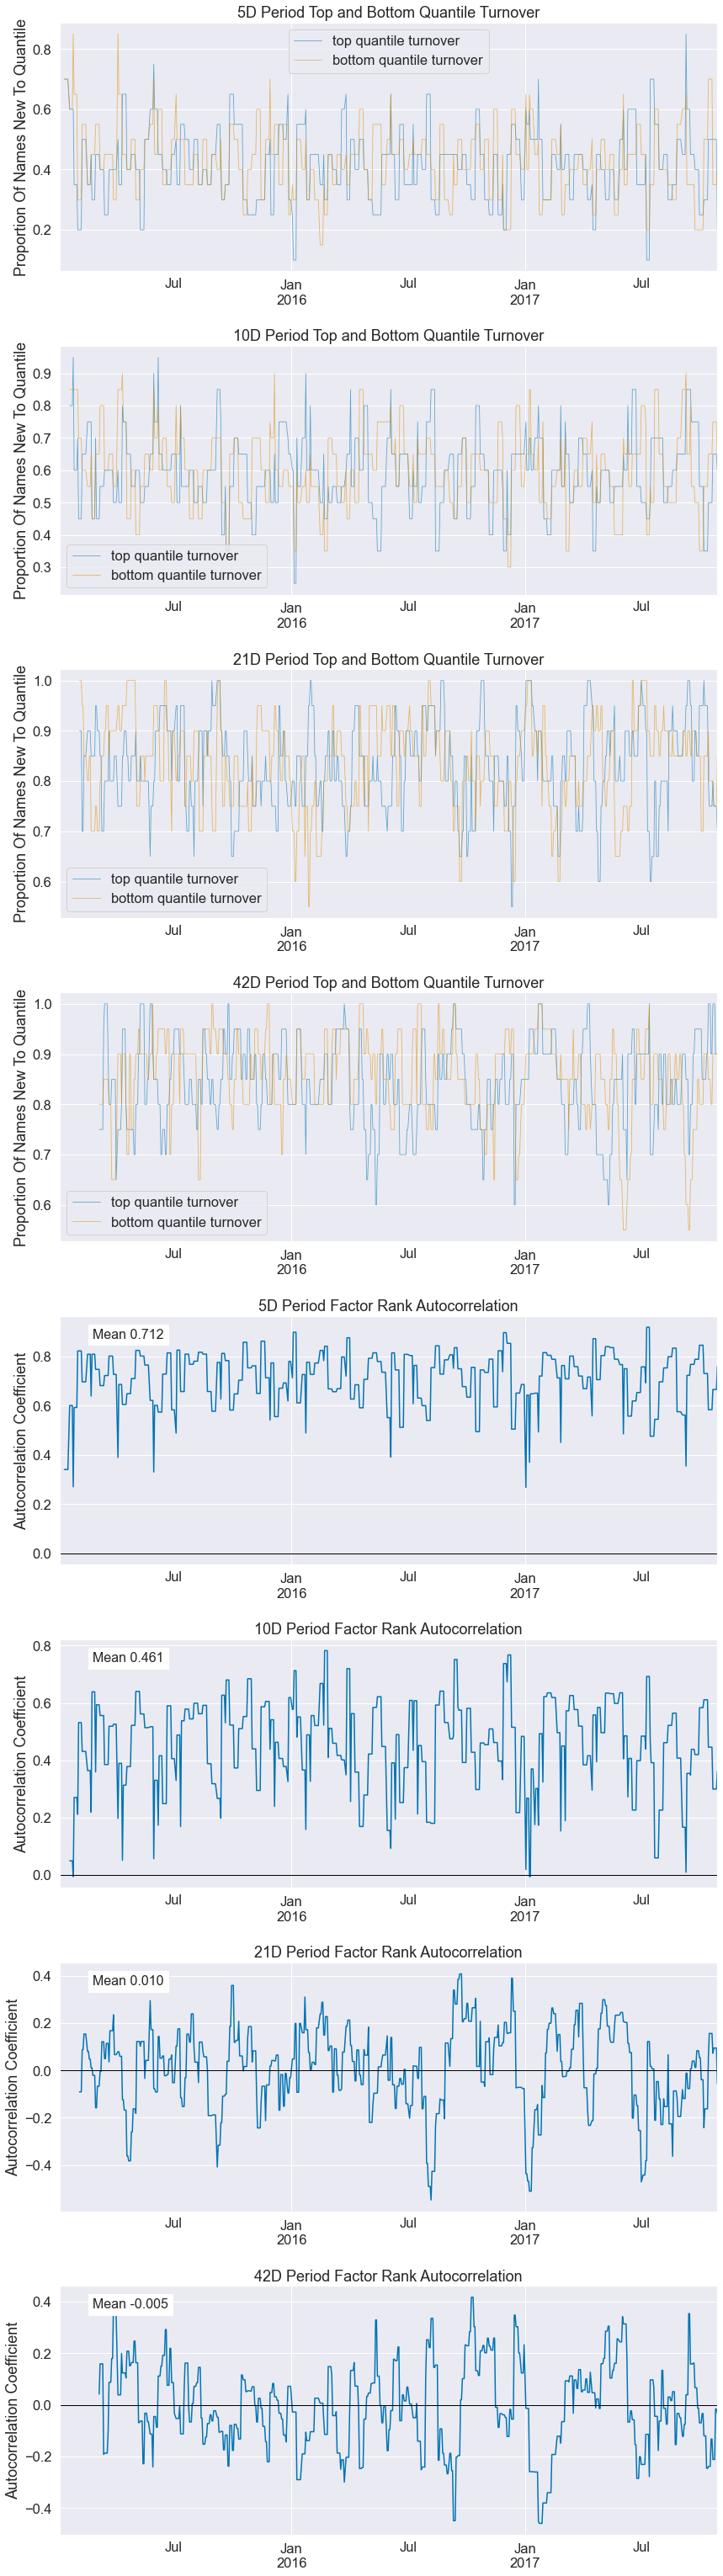

In [21]:
# Turnover Tear Sheet

# # Factor turnover - how many trades are required to adjust a portfolio to the sequence of signals. It measures the share of assets currently in a factor quantile that was not in that quantile in the last period

create_turnover_tear_sheet(alphalens_data);

# Mean factor rank autocorrelation - the correlation of the asset rank due to the factor over various holding periods, more stability is preferable to keep trading costs manageable